# Your name: Peter Gurka
## Assignment Name: CA04 - Ensemble Models

# Program Inititialization Section
## Enter your import packages here

In [67]:
# import packages 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score

!pip install xgboost
import xgboost
from xgboost import XGBClassifier

from sklearn.externals.six import StringIO  
from IPython.display import Image  
!pip install graphviz
import graphviz
from sklearn.tree import export_graphviz
!pip install pydotplus
import pydotplus

from sklearn.metrics import roc_curve, f1_score, recall_score, precision_score, accuracy_score, classification_report, confusion_matrix, roc_auc_score

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /opt/anaconda3/lib/python3.8/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


# Data File Reading Section
## Write code to read in data from external sources here

In [13]:
#read the dataset
all_census = pd.read_csv('/Users/peter.gurka/Google Drive/My Drive/MSBA Colab 2020/ML Algorithms/CA04/census_data.csv')

# Data Quality Analysis

Perform a Data Quality Analysis to find missing values, outliers, NaNs etc. / Display descriptive statistics of each column

In [14]:
all_census.describe()

,y
count,48842.000000
mean,0.239282
std,0.426649
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [15]:
all_census.shape

(48842, 11)

In [16]:
all_census.count()

hours_per_week_bin    48842
occupation_bin        48842
msr_bin               48842
capital_gl_bin        48842
race_sex_bin          48842
education_num_bin     48842
education_bin         48842
workclass_bin         48842
age_bin               48842
flag                  48842
y                     48842
dtype: int64

In [17]:
all_census.isnull().sum()

hours_per_week_bin    0
occupation_bin        0
msr_bin               0
capital_gl_bin        0
race_sex_bin          0
education_num_bin     0
education_bin         0
workclass_bin         0
age_bin               0
flag                  0
y                     0
dtype: int64

In [18]:
all_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   hours_per_week_bin  48842 non-null  object
 1   occupation_bin      48842 non-null  object
 2   msr_bin             48842 non-null  object
 3   capital_gl_bin      48842 non-null  object
 4   race_sex_bin        48842 non-null  object
 5   education_num_bin   48842 non-null  object
 6   education_bin       48842 non-null  object
 7   workclass_bin       48842 non-null  object
 8   age_bin             48842 non-null  object
 9   flag                48842 non-null  object
 10  y                   48842 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 4.1+ MB


In [19]:
all_census.head()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,b. 31-40,b. Mid - Low,b. Mid,c. > 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,train,0
1,a. 0-30,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,train,0
2,b. 31-40,a. Low,b. Mid,a. = 0,c. High,b. 9-12,b. Mid,b. income,d. 36-40 & 56-60,train,0
3,b. 31-40,a. Low,c. High,a. = 0,b. Mid,a. 0-8,a. Low,b. income,e. 40-55,train,0
4,b. 31-40,e. High,c. High,a. = 0,a. Low,c. 13,c. Bachelors,b. income,b. 26-30 & 71-100,train,0


In [20]:
all_census.tail()

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
48837,b. 31-40,e. High,b. Mid,a. = 0,b. Mid,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48838,b. 31-40,b. Mid - Low,a. Low,a. = 0,b. Mid,b. 9-12,b. Mid,a. no income,c. 31-35 & 61-70,test,0
48839,d. 41-50 & 61-70,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,d. 36-40 & 56-60,test,0
48840,b. 31-40,b. Mid - Low,a. Low,c. > 0,c. High,c. 13,c. Bachelors,b. income,e. 40-55,test,0
48841,e. 51-60,e. High,c. High,a. = 0,c. High,c. 13,c. Bachelors,b. income,c. 31-35 & 61-70,test,1


## Cleansing the dataset

Perform necessary data cleansing and transformation based on your
observations from the data quality analysis

#### Dropping columns that aren't required
All columns are required it seems at this time
#### Dropping rows where no data is available
There are no missing values according to my data quality analysis

In [21]:
# Displaying  final columns
all_census.columns

Index(['hours_per_week_bin', 'occupation_bin', 'msr_bin', 'capital_gl_bin',
       'race_sex_bin', 'education_num_bin', 'education_bin', 'workclass_bin',
       'age_bin', 'flag', 'y'],
      dtype='object')

# Exploratory Data Analysis

<AxesSubplot:xlabel='age_bin'>

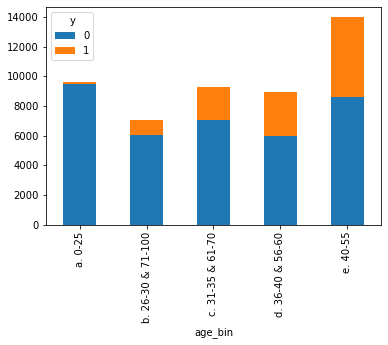

In [22]:
#Age Graph
all_census.pivot_table(index= 'age_bin', columns= 'y', aggfunc= 'size').plot.bar(stacked= True)

<AxesSubplot:xlabel='capital_gl_bin'>

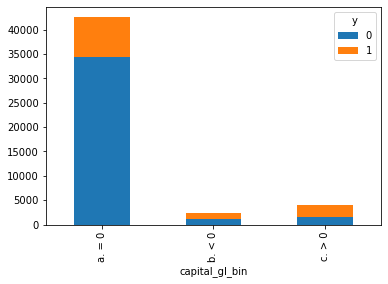

In [23]:
#Capital Gain/Loss Graph
all_census.pivot_table(index= 'capital_gl_bin', columns= 'y', aggfunc= 'size').plot.bar(stacked= True)

<AxesSubplot:xlabel='education_bin'>

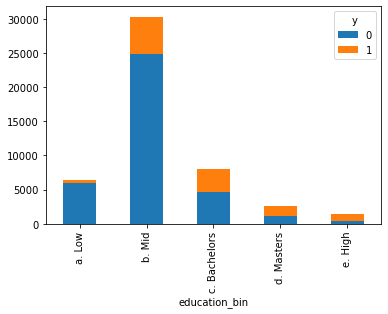

In [24]:
#Education Graph
all_census.pivot_table(index= 'education_bin', columns= 'y', aggfunc= 'size').plot.bar(stacked= True)

<AxesSubplot:xlabel='hours_per_week_bin'>

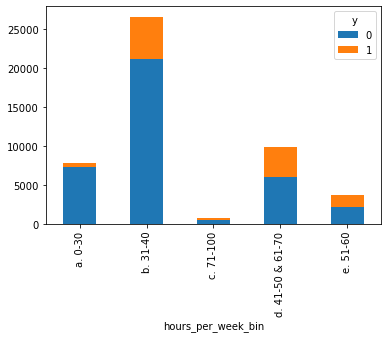

In [25]:
#Hours Per Week Graph
all_census.pivot_table(index= 'hours_per_week_bin', columns= 'y', aggfunc= 'size').plot.bar(stacked= True)

<AxesSubplot:xlabel='msr_bin'>

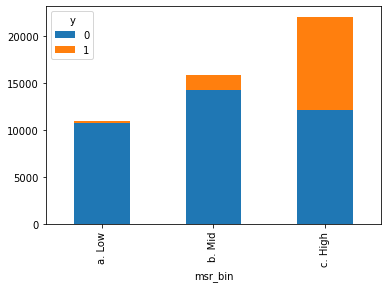

In [26]:
#Marriage Status and Relationship Graph
all_census.pivot_table(index= 'msr_bin', columns= 'y', aggfunc= 'size').plot.bar(stacked= True)

<AxesSubplot:xlabel='occupation_bin'>

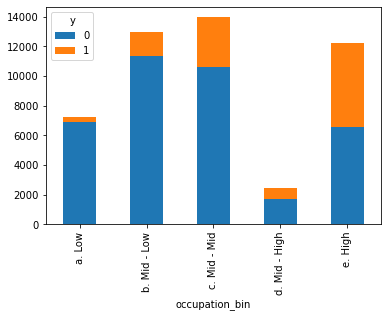

In [27]:
#Occupation Graph
all_census.pivot_table(index= 'occupation_bin', columns= 'y', aggfunc= 'size').plot.bar(stacked= True)

<AxesSubplot:xlabel='race_sex_bin'>

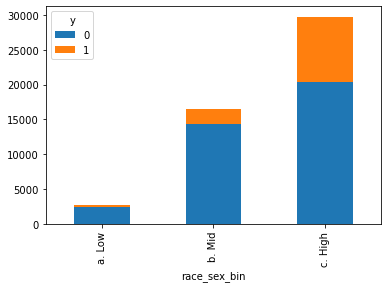

In [28]:
#Race and Sex Graph
all_census.pivot_table(index= 'race_sex_bin', columns= 'y', aggfunc= 'size').plot.bar(stacked= True)

# Build Decision Tree Classifier Models

In [29]:
# export feature coulumns as categorical variables
for x in ['hours_per_week_bin',
          'occupation_bin',
          'msr_bin',
          'capital_gl_bin',
          'race_sex_bin',
          'education_num_bin',
          'education_bin',
          'workclass_bin',
          'age_bin'
         ]:
    all_census[x] = all_census[x].astype('category')

In [30]:
#apply label encoder 
all_census[['hours_per_week_bin',
          'occupation_bin',
          'msr_bin',
          'capital_gl_bin',
          'race_sex_bin',
          'education_num_bin',
          'education_bin',
          'workclass_bin',
          'age_bin']]=all_census[['hours_per_week_bin',
          'occupation_bin',
          'msr_bin',
          'capital_gl_bin',
          'race_sex_bin',
          'education_num_bin',
          'education_bin',
          'workclass_bin',
          'age_bin']].apply(LabelEncoder().fit_transform)

In [31]:
all_census

,hours_per_week_bin,occupation_bin,msr_bin,capital_gl_bin,race_sex_bin,education_num_bin,education_bin,workclass_bin,age_bin,flag,y
0,1,1,1,2,2,2,2,1,3,train,0
1,0,4,2,0,2,2,2,1,4,train,0
2,1,0,1,0,2,1,1,1,3,train,0
3,1,0,2,0,1,0,0,1,4,train,0
4,1,4,2,0,0,2,2,1,1,train,0
...,...,...,...,...,...,...,...,...,...,...,...
48837,1,4,1,0,1,2,2,1,3,test,0
48838,1,1,0,0,1,1,1,0,2,test,0
48839,3,4,2,0,2,2,2,1,3,test,0
48840,1,1,0,2,2,2,2,1,4,test,0


In [32]:
#split all_census into test and train
test=all_census.loc[all_census.flag == 'test']
train=all_census.loc[all_census.flag == 'train']

In [33]:
# drop the flag column since it is no longer needed
test.drop(columns = 'flag', inplace = True)
train.drop(columns = 'flag', inplace = True)

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [34]:
#split both datasets into attributes and labels
y_train = train['y']
x_train = train.drop('y',axis=1)
y_test = test['y']
x_test = test.drop('y',axis=1)

In [35]:
# syntax from professor
dtree = DecisionTreeClassifier(min_samples_split=18,
                               min_samples_leaf=20,
                               max_depth=48, 
                               random_state=101,
                               max_features = None,
                               criterion='gini')

dtree.fit(x_train, y_train)
y_pred=dtree.predict(x_test)

# Building a Random Forest Model

<AxesSubplot:>

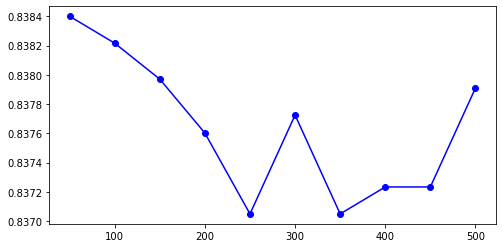

In [36]:
# using similar approach of Section 2 above, plot a graph of Accuracy vs n_estimator
# Use n_estimator values as [50,100,150,200,250,300,350,400,450,500]
results = []

n_estimator = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimator:
    model = RandomForestClassifier(n_estimators=trees, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    results.append(accuracy)
    
plt.figure(figsize=(8,4))
pd.Series(results, n_estimator).plot(color='blue',marker='o')

# Building AdaBoost, Gradient Boost (classifier) and XGB Model

### AdaBoost

<AxesSubplot:>

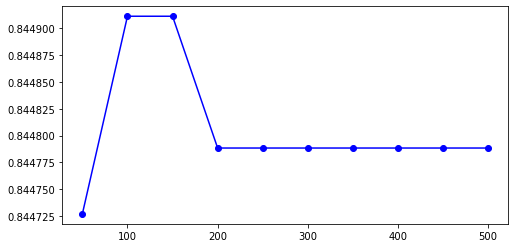

In [37]:
# repeat the process of section 3 for Adaboost model
results = []

n_estimator = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimator:
    model = AdaBoostClassifier(n_estimators=trees, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    results.append(accuracy)
    
plt.figure(figsize=(8,4))
pd.Series(results, n_estimator).plot(color='blue',marker='o')

### Gradient Boost (classifier)

<AxesSubplot:>

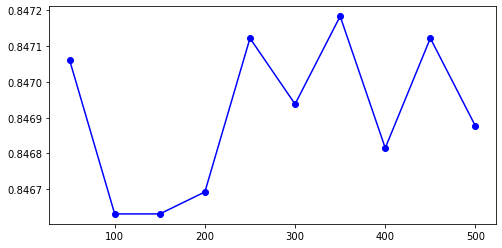

In [38]:
# repeat the process of section 3 for Gradient Boost model
results = []

n_estimator = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimator:
    model = GradientBoostingClassifier(n_estimators=trees, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    results.append(accuracy)
    
plt.figure(figsize=(8,4))
pd.Series(results, n_estimator).plot(color='blue',marker='o')

### XGB

In [28]:
# repeat the process of section 3 for XGB model
results = []

n_estimator = [50,100,150,200,250,300,350,400,450,500]

for trees in n_estimator:
    model = XGBClassifier(n_estimators=trees, random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test == y_pred)
    results.append(accuracy)
    
plt.figure(figsize=(8,4))
pd.Series(results, n_estimator).plot(color='blue',marker='o')

NameError: name 'XGBClassifier' is not defined

This error is due to the inability to load XGB into Jupyter. Professor is aware of the error and the steps I have tried to take to prevent this. This should, in theory, work correctly if ran in a different software.

# Compare Performance

### Performance Comparison Table

In [59]:
#Random Forest
model1 = []

n_estimator = 50

model = RandomForestClassifier(n_estimators=trees, random_state=101)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = np.mean(y_test == y_pred)
auc = roc_auc_score(y_test, y_pred)
model1.append(accuracy)
model1.append(auc)

In [60]:
model1

[0.8379092193354216, 0.7465327973794466]

In [63]:
#Adaboost
model2 = []

n_estimator = 50

model = AdaBoostClassifier(n_estimators=trees, random_state=101)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = np.mean(y_test == y_pred)
auc = roc_auc_score(y_test, y_pred)
model2.append(accuracy)
model2.append(auc)

In [64]:
model2

[0.8447884036607088, 0.7460076328264228]

In [65]:
#Gradient Boost
model3 = []

n_estimator = 50

model = GradientBoostingClassifier(n_estimators=trees, random_state=101)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = np.mean(y_test == y_pred)
auc = roc_auc_score(y_test, y_pred)
model3.append(accuracy)
model3.append(auc)

In [66]:
model3

[0.8468767274737424, 0.7609339548491469]

In [68]:
#XGB
model4 = []

n_estimator = 50

model = XGBClassifier(n_estimators=trees, random_state=101)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = np.mean(y_test == y_pred)
auc = roc_auc_score(y_test, y_pred)
model4.append(accuracy)
model4.append(auc)

NameError: name 'XGBClassifier' is not defined

In [69]:
model4

[]

Same issue as before with XGB

In [71]:
performance_list = [model1, model2, model3, model4]
performance_list

[[0.8379092193354216, 0.7465327973794466],
 [0.8447884036607088, 0.7460076328264228],
 [0.8468767274737424, 0.7609339548491469],
 []]

In [78]:
from pandas import DataFrame
df = DataFrame (performance_list, columns=['Accuracy', 'AUC'], index=['Random Forest','AdaBoost','Gradient Booost', 'XGB'])

df

,Accuracy,AUC
Random Forest,0.837909,0.746533
AdaBoost,0.844788,0.746008
Gradient Booost,0.846877,0.760934
XGB,NaN,NaN


### Values of all common Hyper-parameters

In [61]:
n_estimator = 50
n_estimator

50

In [62]:
random_state=101
random_state

101